<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve 


In [2]:
data=pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
def fun_date(data):
    print('**Общая информация датафрейма**')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Просмотр статистических данных**')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод рандомных строк датафрейма**')
    print(data.sample(n=3, random_state=1))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод первых пяти строк датафрейма**')
    print(data.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва дубликатов датафрейма**')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Вывод количесва пропущеных значений датафрейма**')
    print(data.isnull().sum())
    print('-------------------------------------------------------------------------------------------------------------')
print(fun_date(data))

**Общая информация датафрейма**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
-------------------------------------------------------------------------------------------------------------
**Просмотр статистических данных**
         RowNumber    CustomerId   CreditScore           Age       Tenure  \
cou

In [4]:
data.dropna(subset=['Tenure'], inplace=True)

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
data['Gender'] = pd.get_dummies(data['Gender'])
data_ohe=pd.get_dummies(data['Geography'])
data['France_user']=data_ohe['France']
data['Spain_user']=data_ohe['Spain']
data['Germany_user']=data_ohe['Germany']

Разбил данные по дамми-значениям, чтобы можно было в дальнейшем с ними работать. Также привел к численному виду гендер.

## Исследование задачи

In [8]:
features = data.drop(['Exited', 'Surname', 'CustomerId', 'Geography'], axis =1)
target = data['Exited']


features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, test_size=0.5, random_state=12345)

print('Обучающая выборка:',features_train.shape)
print(target_train.shape)
print('Валидационная выборка:',features_valid.shape)
print(target_valid.shape)
print('Тестовая выборка:',features_test.shape)
print(target_test.shape)

Обучающая выборка: (5454, 13)
(5454,)
Валидационная выборка: (1819, 13)
(1819,)
Тестовая выборка: (1818, 13)
(1818,)


Разбил данные в соотношении 3:1:1

In [9]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)



In [10]:
print('Матрица ошибок',confusion_matrix(target_valid,predicted_valid))
print()
print('Полнота',recall_score(target_valid, predicted_valid))
print()
print('Точность',precision_score(target_valid, predicted_valid))
print()
print('F1-мера',f1_score(target_valid, predicted_valid))


Матрица ошибок [[1284  184]
 [ 189  162]]

Полнота 0.46153846153846156

Точность 0.4682080924855491

F1-мера 0.46484935437589675


In [11]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4633663366336634


F1 мера не достаточно хороша, будем улучшать!

## Борьба с дисбалансом

In [12]:
def checkstat (model, features, target): 
    model.fit(features, target)
    predicted_valid=model.predict(features_valid)
    print("F1:", f1_score(target_valid, predicted_valid))
    print(recall_score(target_valid, predicted_valid))
    print(precision_score(target_valid, predicted_valid))

In [13]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model = LogisticRegression(random_state=12345,solver='liblinear')
checkstat(model, features_upsampled, target_upsampled)

F1: 0.34724368882019574
0.9601139601139601
0.2119496855345912


In [14]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(random_state=12345,solver='liblinear')
checkstat(model, features_upsampled, target_upsampled)

F1: 0.34724368882019574
0.9601139601139601
0.2119496855345912


In [15]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.94, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1=f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.02 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.04 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.06 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.08 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.10 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.12 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.14 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.16 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.18 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.20 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.22 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.24 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.26 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.28 | Точность = 0.193, Полнота = 1.000, F1 = 0.324
Порог = 0.30 | Точность = 0.193, Полнота = 0.997, F1 = 0.324
Порог = 0.32 | Точность 

Самый оптимальный порог, я считаю, нужно взять 0.74, т.к. у него самые высокие показатели F1

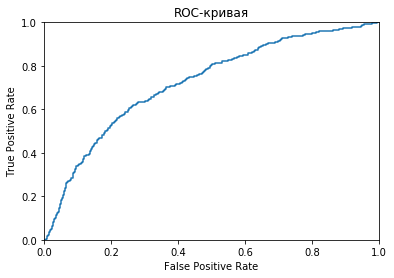

In [16]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [17]:
def proby (model,threshold): 
    threshold=0.74
    prob=[]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    for probab in probabilities_one_valid:
        if probab > threshold:
            prob.append(1)
        else:
            prob.append(0)
    return prob

In [18]:
#Дерево решений
model = DecisionTreeClassifier(random_state=12345)
best_model = None
best_result = 3214
best_leaf = 0
best_depth = 0
best_split = 2

for split in range(3, 11):
    for leaf in range(1, 11):
        for depth in range (1, 15):
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, min_samples_split= split)
            model.fit(features_train, target_train) 
            predictions_valid = model.predict(features_valid) 
            movedts_valid=proby(model, threshold)
            result = model.score(features_valid, movedts_valid) 
            if result < best_result:
                best_model = model
                best_result = result
                best_leaf = leaf
                best_depth = depth
                best_split=split
print("Точность наилучшей модели на валидационной выборке:", best_result, 
      "минимум значений в листе:", best_leaf, "Максимальная глубина:", depth, "лучшее разделение:", best_split)


Точность наилучшей модели на валидационной выборке: 0.8669598680593733 минимум значений в листе: 1 Максимальная глубина: 14 лучшее разделение: 3


In [19]:
#Случайный лес
best_model = None
best_result = 3214
best_est = 0
best_depth = 0
for est in range(1, 101, 10):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_valid, target_valid) 
        predictions_valid = model.predict(features_valid)
        movedts_valid=proby(model, 0.74)
        result = model.score(features_valid, movedts_valid)
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Точность наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est, "Максимальная глубина:", depth)

Точность наилучшей модели на валидационной выборке: 0.9169873556899395 Количество деревьев: 21 Максимальная глубина: 14


In [20]:
#Логистическая регрессия
model_lr = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr.fit(features_train, target_train)
movedts_valid=proby(model, 0.74)
result = model.score(features_valid, movedts_valid)
print("Точность модели на валидационной выборке:", result)

Точность модели на валидационной выборке: 0.9219351291918637


Провел анализ по разным моделям, Логистическая регрессия показывает себя лучшее всего

## Тестирование модели

In [21]:
features_bigtrain=pd.concat([features_train, features_valid])
target_bigtrain=pd.concat([target_train, target_valid])

In [22]:
def result (model):
    model.fit(features_bigtrain, target_bigtrain)
    predictions_test = model.predict(features_test) 
    movedts_valid=proby(model, 0.74)
    result = model.score(features_valid, movedts_valid)
    print("Точность модели на тестовой выборке:",result)
    f1=f1_score(target_test, predictions_test)
    print("Ф1 модели", f1) 

In [23]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
result(model_lr)

model_dt = DecisionTreeClassifier(random_state=12345, max_depth=14)

result(model_dt)

model_rf = RandomForestClassifier(random_state=12345, n_estimators=71, max_depth=14, class_weight='balanced')
result(model_rf)

a=np.random.randint(0, 2, size=len(target_test))
def error_count(answers, predictions):
    return ((answers == predictions).sum())/len(answers)
print("Результат генератора в сравнении с тестовой выборкой", error_count(a, target_test))

Точность модели на тестовой выборке: 0.7003848268279275
Ф1 модели 0.5004616805170822
Точность модели на тестовой выборке: 0.9884551951621771
Ф1 модели 0.492176386913229
Точность модели на тестовой выборке: 0.9213853765805388
Ф1 модели 0.6242236024844721
Результат генератора в сравнении с тестовой выборкой 0.5022002200220022


Удалось достичь F1 более 0.59 у модели случайного леса и даже давольно неплохую точность. Хуже всего себя проявила логистическая регрессия, слишком большой провал в показателях. Также пугающе большая точность у дерево решений...Возможно стоит лучше проработать порог принятия решения.